# **Analyzing Customer Data for a Telecom Company to Predict Churn**

## **Introduction: Project Scope & Purpose**

We will be working with a dataset that tracks a telco company's customer churn based on a variety of possible factors. Churn means that the customer ended up cancelling their service with the telco company (the company lost the customer). **What we aim to do is to predict churn by leveraging the company's dataset that contains data on current and churned customers**. By building a classification model that predicts whether a customer will churn, the company will have data regarding which customers might churn, and why. The company may use this information to determine to which customers they must allocate resources to minimize churn. This data can be used to make decisions regarding the application of deals or promotions, to maximize their business.

This dataset mostly contains categorical variables such as whether or not a customer is a senior citizen, has dependents, has phone/internet service, etc. There are a few numeric variables, such as tenure (the number of years the customer has been with the firm) as well as their monthly and total charges paid to the telco company. The outcome variable is also categorical, churn, and has 2 categories: Yes or No. The challenge is thus that we need to construct a model with good predictive accuracy when most of our predictors are categorical variables. We will discuss how we approach this challenge in further detail later in our analysis.

## **Preliminary Exploratory Data Analysis**

We begin this process by reading our raw data from its' web source into R. We do so below:

In [4]:
set.seed(1984)
library(tidyverse)
library(tidymodels)
library(readxl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [5]:
url <- "https://public.dhe.ibm.com/software/data/sw-library/cognos/mobile/C11/data/CustomerChurn.xlsx"

download.file(url, "Churn_Data.xlsx")

churn_data <- read_excel("Churn_Data.xlsx")
churn_data

LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,⋯,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,⋯,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,⋯,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,⋯,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
160192,9305-CDSKC,No,No,No,8,Yes,Yes,Fiber optic,No,⋯,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
680623,1452-KIOVK,No,No,Yes,22,Yes,Yes,Fiber optic,No,⋯,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
340874,6713-OKOMC,No,No,No,10,No,No phone service,DSL,Yes,⋯,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
582674,7892-POOKP,No,Yes,No,28,Yes,Yes,Fiber optic,No,⋯,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes


We are fortunate enough that our data is already mostly in tidy format, and what remains is to change the categorization of certain varibles (e.g. from "chr" to "fct") as well as make sure the columns include periods instead of spaces.

In [6]:
colnames(churn_data) <- make.names(colnames(churn_data))
churn_data

LoyaltyID,Customer.ID,Senior.Citizen,Partner,Dependents,Tenure,Phone.Service,Multiple.Lines,Internet.Service,Online.Security,⋯,Device.Protection,Tech.Support,Streaming.TV,Streaming.Movies,Contract,Paperless.Billing,Payment.Method,Monthly.Charges,Total.Charges,Churn
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,⋯,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,⋯,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,⋯,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
160192,9305-CDSKC,No,No,No,8,Yes,Yes,Fiber optic,No,⋯,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
680623,1452-KIOVK,No,No,Yes,22,Yes,Yes,Fiber optic,No,⋯,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
340874,6713-OKOMC,No,No,No,10,No,No phone service,DSL,Yes,⋯,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
582674,7892-POOKP,No,Yes,No,28,Yes,Yes,Fiber optic,No,⋯,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes


In [7]:
churn_data_vars <- churn_data %>%
    mutate(across(Senior.Citizen:Dependents, as.factor))%>%
    mutate(across(Phone.Service:Payment.Method,as.factor))%>%
    mutate(Churn=as.factor(Churn))
churn_data_vars


LoyaltyID,Customer.ID,Senior.Citizen,Partner,Dependents,Tenure,Phone.Service,Multiple.Lines,Internet.Service,Online.Security,⋯,Device.Protection,Tech.Support,Streaming.TV,Streaming.Movies,Contract,Paperless.Billing,Payment.Method,Monthly.Charges,Total.Charges,Churn
<dbl>,<chr>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>
318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,⋯,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,⋯,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,⋯,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
160192,9305-CDSKC,No,No,No,8,Yes,Yes,Fiber optic,No,⋯,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
680623,1452-KIOVK,No,No,Yes,22,Yes,Yes,Fiber optic,No,⋯,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
340874,6713-OKOMC,No,No,No,10,No,No phone service,DSL,Yes,⋯,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
582674,7892-POOKP,No,Yes,No,28,Yes,Yes,Fiber optic,No,⋯,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes


In [8]:
#Splitting data into training and testing purposes
churn_split <- initial_split(churn_data_vars, prop=0.75, strata=Churn)
churn_train <- training(churn_split)
churn_test <- testing(churn_split)

## **Summarizing Our Data in a Table**

Given that we both have quantitative and categorical data, it is hard to summarize the whole dataset into one table, so we will be doing 2. One table will summarize the average tenure and monthly charges between churn and non-churn customers. The second table will explore the share of customers who are senior citizens, have partners or dependents, whether or not they have a phone service, internet service.

In [9]:
churn_tenure_charge <-churn_data_vars %>%
    group_by(Churn)%>%
    summarise(across(c("Tenure", "Monthly.Charges"), mean))%>%
    rename(Mean.Tenure=Tenure)%>%
    rename(Mean.Monthly.Charges=Monthly.Charges)
    
churn_tenure_charge

`summarise()` ungrouping output (override with `.groups` argument)



Churn,Mean.Tenure,Mean.Monthly.Charges
<fct>,<dbl>,<dbl>
No,37.56997,61.26512
Yes,17.97913,74.44133


In [10]:
senior_share <-churn_data_vars %>%
       count(Senior.Citizen) %>%
       mutate(Yes_No=Senior.Citizen,)%>%
        relocate(Yes_No)

# partner_share <-churn_data_vars %>%
#        count(Partner)%>%
#         mutate(Yes_No=Partner,)%>%
#         relocate(Yes_No)

# dependents_share <-churn_data_vars %>%
#        count(Dependents)%>%
#         mutate(Yes_No=Dependents,)%>%
#         relocate(Yes_No)

phone_service_share <-churn_data_vars %>%
       count(Phone.Service)%>%
        mutate(Yes_No=Phone.Service,)%>%
        relocate(Yes_No)

internet_service_share <-churn_data_vars %>%
    mutate(Internet.Service=as.character(Internet.Service))%>%
    mutate(Internet.Service=replace(Internet.Service, Internet.Service=="DSL", "Yes")) %>%
    mutate(Internet.Service=replace(Internet.Service, Internet.Service=="Fiber optic", "Yes"))%>%
    count(Internet.Service)%>%
    mutate(Yes_No= Internet.Service)%>%
        relocate(Yes_No)


customer_share <- senior_share %>%
#     full_join(partner_share,by="Yes_No")%>%
#     full_join(dependents_share, by="Yes_No")%>%
    full_join(phone_service_share, by="Yes_No")%>%
    full_join(internet_service_share, by="Yes_No")%>%
    select(Yes_No,n.x,n.y,n.x.x,n.y.y,n)%>%
    rename("Senior Citizen"=n.x)%>%
#     rename("Partner"=n.y)%>%
#     rename("Dependents"=n.x.x)%>%
    rename("Phone.Service"=n.y.y)%>%
    rename("Internet.Service"=n)
    
customer_share

Yes_No,Senior Citizen,Partner,Dependents,Phone.Service,Internet.Service
<chr>,<int>,<int>,<int>,<int>,<int>
No,5901,3641,4933,682,1526
Yes,1142,3402,2110,6361,5517


## **Visualizing Data**

We will be taking a look at the distribution of tenure between current and churned customers by leveraging grid facets. We will include vertical lines for the mean, as found in our first table. _______________________(reasoning for why we look at the pattern between these two variables?)

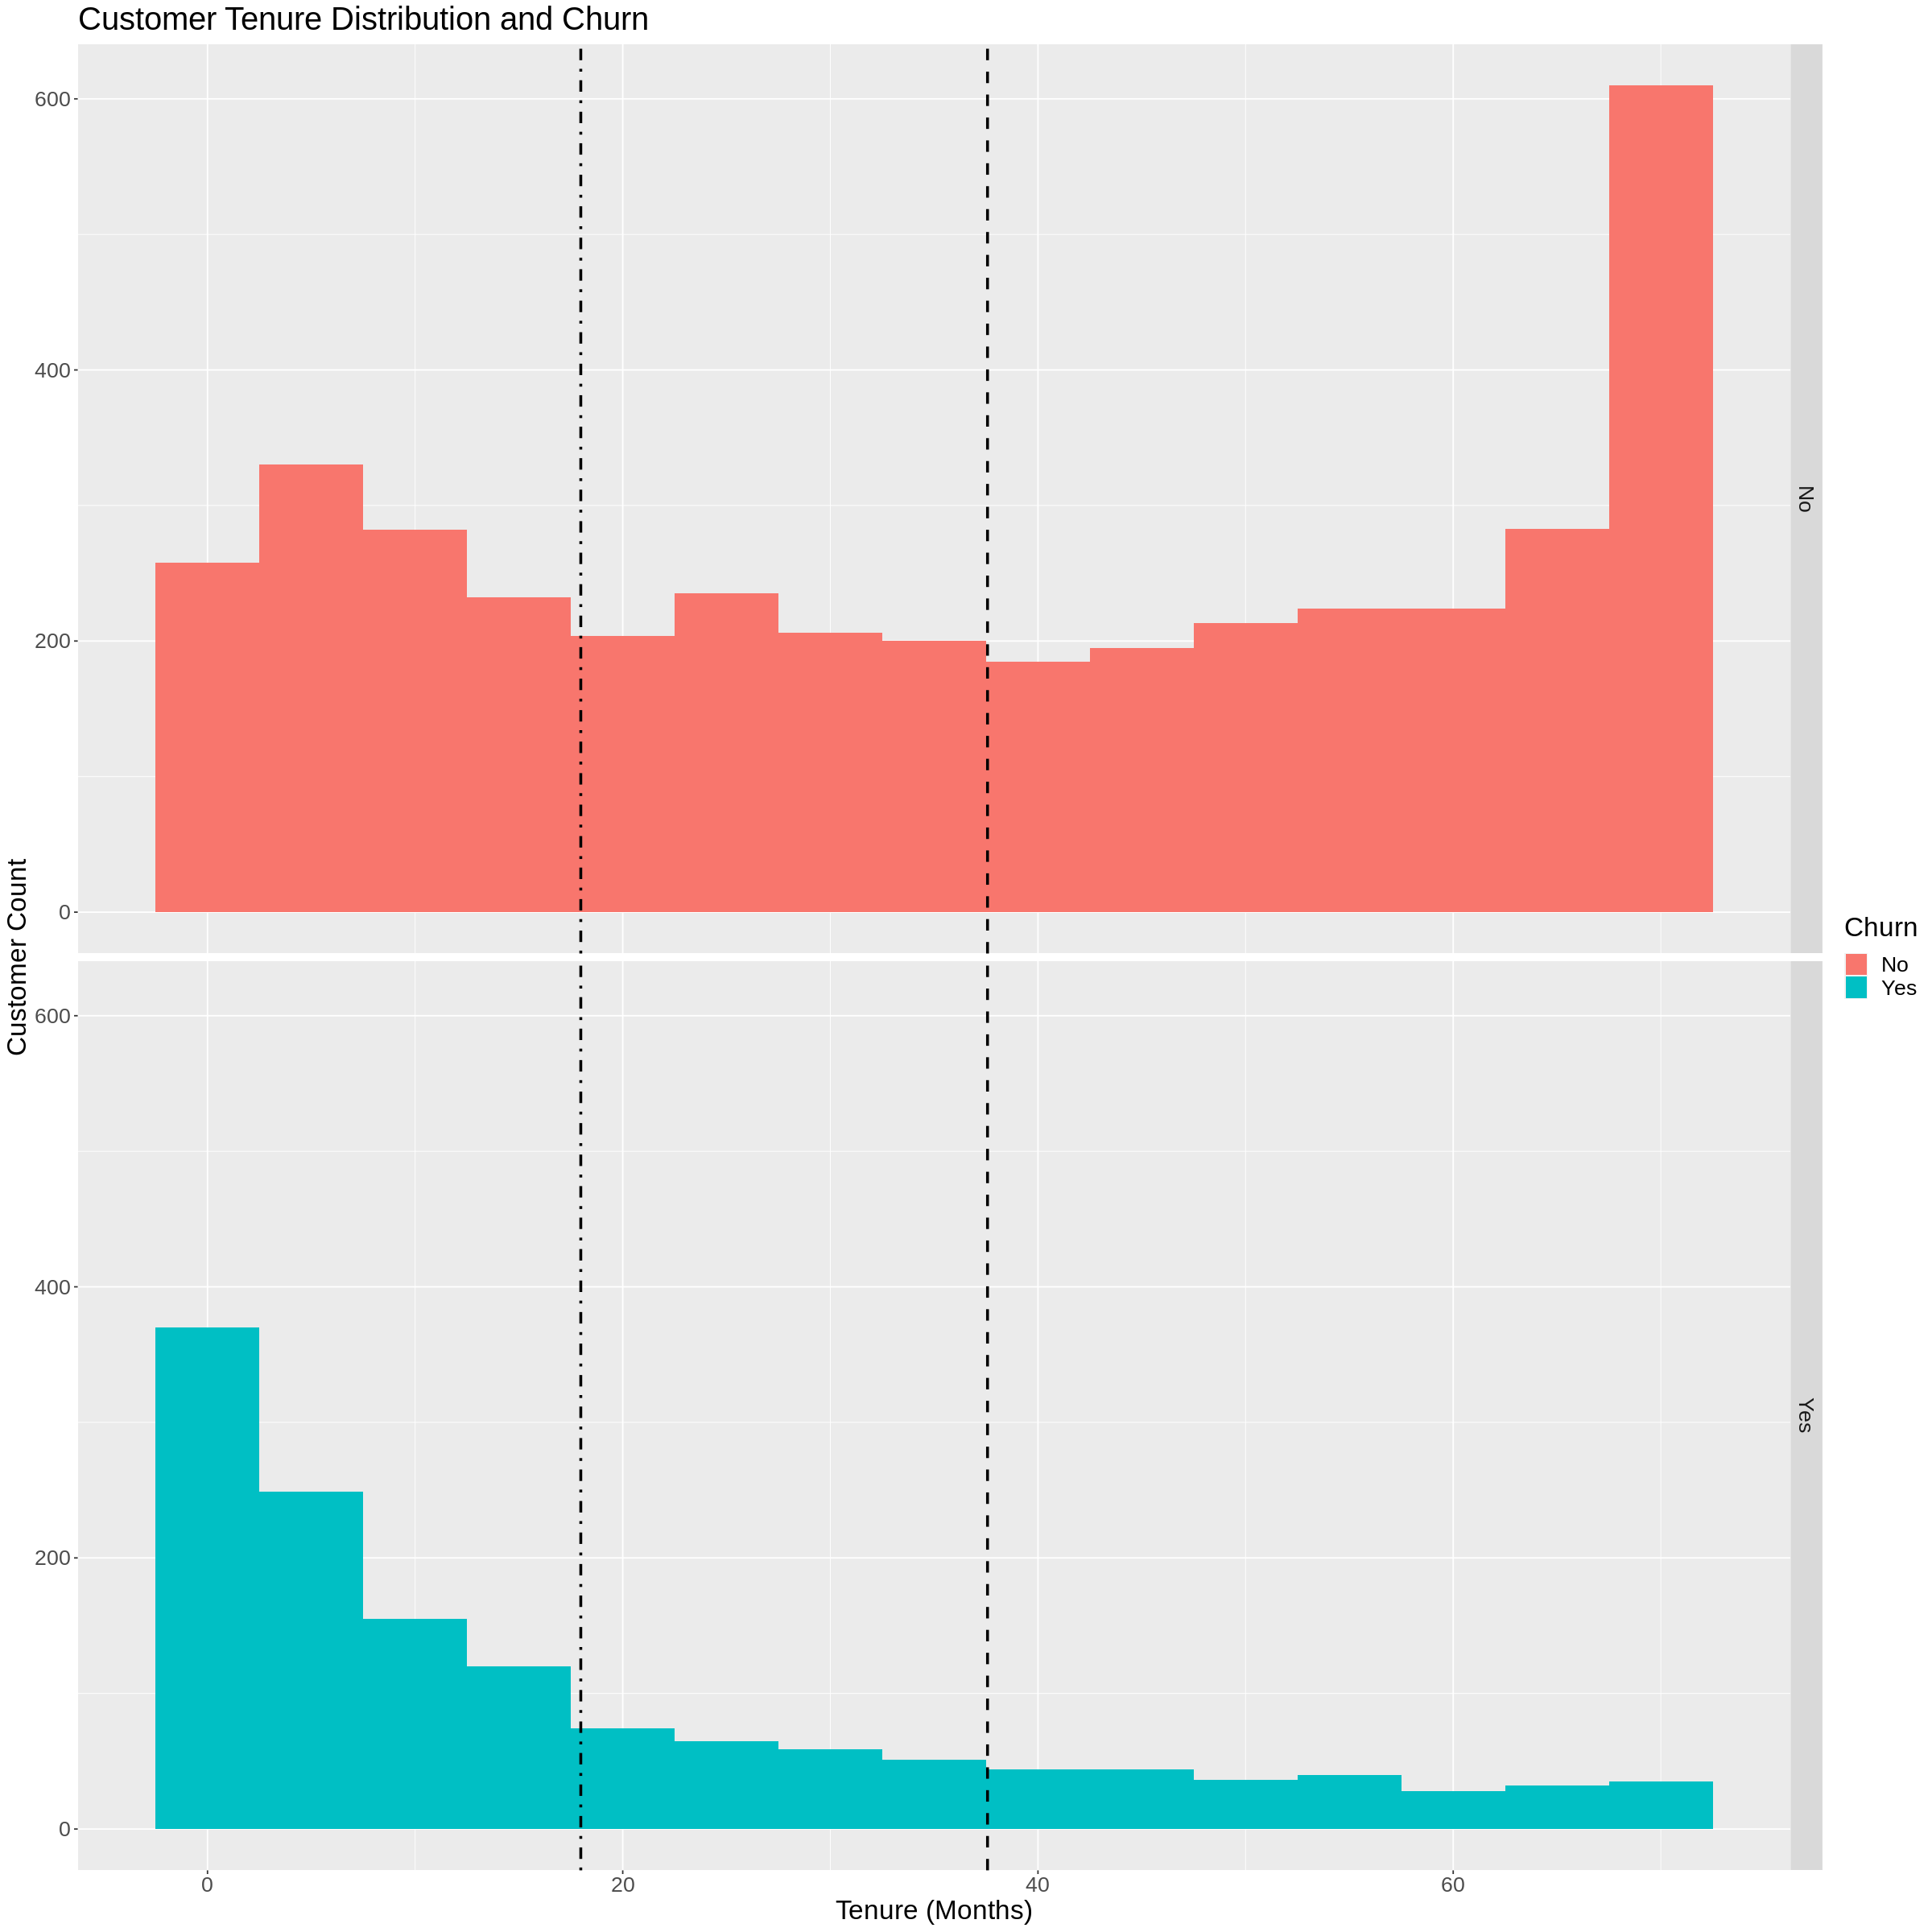

In [11]:
options(repr.plot.width = 20, repr.plot.height = 20)

tenure_dist <- churn_train %>%
    ggplot(aes(x=Tenure, fill=Churn))+
    geom_histogram(position="identity", binwidth=5)+
    facet_grid(Churn ~.)+
    theme(text=element_text(size=20))+
    labs(x="Tenure (Months)",y="Customer Count",fill="Churn")+
    ggtitle("Customer Tenure Distribution and Churn")+
    geom_vline(xintercept=pull(filter(churn_tenure_charge,Churn=="No"),Mean.Tenure),linetype="dashed",size=1.0)+
    geom_vline(xintercept=pull(filter(churn_tenure_charge,Churn=="Yes"),Mean.Tenure),linetype="dotdash",size=1.0)

tenure_dist


What this preliminary visualization demonstrates is that new customers are far more likely to churn than customers who have been with the company for a longer period of time. This leads us to the question: how might we encourage new customers to remain with the company?

(perhaps adding another visualization for some of the categorical variables, such that we may determine which ones might be subject to churn (determine which categories have a notable impact on churn. This tells us what to include in our classification model))

## **Methods**

1) Using KNN classification, and the variables which we determined have an impact on churn, we will build a classification system such that we may determine, to a calculated degree of accuracy, whether or not a customer will churn. 

2) We will test our model using testing data


a) if no churn, ignore, as no further involvement needed to keep customer. If churn, determine cause of customer churn.

## **Expected Outcomes and Significance**

b) based on reason for customer churn, reach out with offer according to what business is capable of giving up to keep customer (this is a future question)